# 02725 HW 3

In [167]:
import pandas as pd
import numpy as np
import math
import sys
np.set_printoptions(threshold=sys.maxsize)

In [168]:
data = pd.read_csv("matrix_A.txt", header=None)
data = data.to_numpy()
data.shape
data_noisy = pd.read_csv("matrix_noisy_A.txt", header=None)
data_noisy = data_noisy.to_numpy()


In [169]:
data

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

## 1.1 Hierarchical Clustering

In [170]:
def get_euclidean_distance(row, other_row):
    val = 0
    for i in range(len(row)):
        diff_sqrd = (row[i] - other_row[i]) ** 2
        val += diff_sqrd
    return np.sqrt(val)

def distance_matrix(d):
    rows = d.shape[0]
    cols = d.shape[1]
    distance_matrix = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(i+1, rows):
            distance_matrix[i, j] = get_euclidean_distance(d[i], d[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

def average_linkage(c1, c2, dist_mat):
    val = 0
    for i in c1:
        for j in c2:
            val += dist_mat[i, j]
    final_val = val / (len(c1) * len(c2))
    return final_val

def update_clusters(c_list, pair):
    new_c_list = []
    # Merge the two clusters
    merged_cluster = c_list[pair[0]] + c_list[pair[1]]
    # Add the merged cluster to the new list
    new_c_list.append(merged_cluster)
    # Add all other clusters, except the ones that were merged
    for i, cluster in enumerate(c_list):
        if i not in pair:
            new_c_list.append(cluster)
    return new_c_list

def hierarchical_clustering(dist_mat, k):
    # Initially, treat each gene as a separate cluster.
    clusters = []
    for gene in range(len(dist_mat)):
        clusters.append([gene])

    while len(clusters) > k:
        # Initialize minimum distance and cluster pair
        min_dist = float('inf')
        closest_clusters = None

        # Find the closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = average_linkage(clusters[i], clusters[j], dist_mat)
                if distance < min_dist:
                    min_dist = distance
                    closest_clusters = (i, j)
        
        clusters = update_clusters(clusters, closest_clusters)

    return clusters

In [171]:
# Running Hierarchical clustering on matrix A and noisy matrix A
k_vals = []
for i in range(len(data)):
    k_vals.append(i+1)
dist_mat = distance_matrix(data)

clusters_for_all_k = dict()
clusters_for_all_k_noisy = dict()
for k in k_vals:
    clusters_for_all_k[k] = hierarchical_clustering(dist_mat, k)
    

print("The clusters in matrix A when K = 30", clusters_for_all_k[30])

The clusters in matrix A when K = 30 [[5, 13], [4, 11, 17, 32], [1, 2, 3, 7], [0, 9, 33, 36], [6], [8], [10], [12], [14], [15], [16], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [34], [35], [37], [38], [39]]


In [172]:
def calc_max_dist(clusters_dict, mat):
    # maximum distance between gene pairs in the same cluster
    max_distance = dict()

    for k, clusters in clusters_dict.items():
        max_val = 0
        for cluster in clusters:
            if len(cluster) > 1:
                for i in range(len(cluster)):
                    for j in range(i+1, len(cluster)):
                        val = mat[cluster[i], cluster[j]]
                        if val > max_val:
                            max_val = val
        max_distance[k] = max_val
    return max_distance

def calc_min_dist(clusters_dict, mat):
    # minimum distance between gene pairs in different clusters
    min_distance = dict()

    for k, clusters in clusters_dict.items():
        min_val = float('inf')
        for c1_idx in range(len(clusters)):
            for c2_idx in range(c1_idx+1, len(clusters)):
                c1 = clusters[c1_idx]
                c2 = clusters[c2_idx]
                for i in c1:
                    for j in c2:
                        val = mat[i, j]
                        if val < min_val:
                            min_val = val
        min_distance[k] = min_val if min_val != float('inf') else 0
    return min_distance

# Usage
max_dist_same_cluster_matA = calc_max_dist(clusters_for_all_k, dist_mat)
min_dist_diff_cluster_matA = calc_min_dist(clusters_for_all_k, dist_mat)


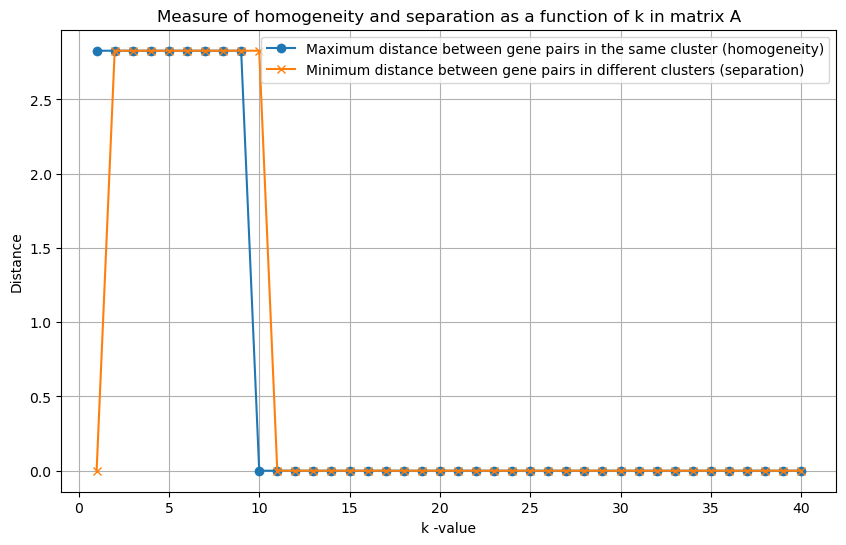

In [173]:
import matplotlib.pyplot as plt
assert max_dist_same_cluster_matA.keys() == min_dist_diff_cluster_matA.keys()
keys = list(max_dist_same_cluster_matA.keys())
max_values = [max_dist_same_cluster_matA[k] for k in keys]
min_values = [min_dist_diff_cluster_matA[k] for k in keys]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(keys, max_values, label='Maximum distance between gene pairs in the same cluster (homogeneity)', marker='o')
plt.plot(keys, min_values, label='Minimum distance between gene pairs in different clusters (separation)', marker='x')
plt.xlabel('k -value')
plt.ylabel('Distance')
plt.title('Measure of homogeneity and separation as a function of k in matrix A')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Biclustering with SAMBA

In [174]:
def get_weighted_matrix(d):
    rows, cols = d.shape
    weighted_matrix = np.zeros((rows, cols))
    for row in range(rows):
        for col in range(cols):
            if d[row, col] == 0:
                weighted_matrix[row, col] = math.log((0.1/0.9)) 
            else: 
                weighted_matrix[row, col] = math.log(0.9 / 0.1) 
    return weighted_matrix

def SAMBA(d, wt_mat):
    original_rows, _ = d.shape
    deletions = []
    all_clusters = []
    while len(deletions) < original_rows:
        rows, cols = d.shape 
        for row in range(rows):
            clusters = [row]
            set_of_neighbors = np.where(d[row, :] == 1)[0]
            deletions.append(row)
            connections = set()
            for n in set_of_neighbors:
                for r in range(rows):  
                    if (d[r, n] == 1) and not(r in deletions): 
                        connections.add(r)
            
            for u in connections:
                wt_sum = 0
                for v in set_of_neighbors:
                    wt_sum += wt_mat[u, v]  
                if wt_sum > 0:
                    clusters.append(u)

            all_clusters.append(clusters)

            deletions += list(set(clusters))
    return all_clusters
    
weighted_matrix = get_weighted_matrix(data)
samba_clusters = SAMBA(data, weighted_matrix)
print(samba_clusters)

[[0, 9, 36, 33], [1, 2, 3, 7], [2], [3], [4, 32, 17, 11], [5, 29, 34, 13], [6, 8, 35, 21], [7], [8], [9], [10, 26, 22, 31], [11], [12, 16, 25, 20], [13], [14, 18, 19, 37], [15, 24, 27, 39], [16], [17], [18], [19], [20], [21], [22], [23, 38, 28, 30], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39]]


In [175]:
def jaccard_similarity(d, clusterA, clusterB):
    rows, cols = d.shape 

    num_intersections = 0
    num_unions = 0
    for row in range(len(d)):
        for other_row in range(row+1, len(d)):
            in_same_cluster_A = False
            in_same_cluster_B = False 

            for cluster in clusterA:
                if (row in cluster) and (other_row in cluster):
                    in_same_cluster_A = True
            for cluster in clusterB:
                if (row in cluster) and (other_row in cluster):
                    in_same_cluster_B = True

            if in_same_cluster_A and in_same_cluster_B:
                num_intersections += 1
            if in_same_cluster_A or in_same_cluster_B:
                num_unions += 1
   
    jaccard_similarity = num_intersections / num_unions
    jaccard_distance =  1 - jaccard_similarity
    return jaccard_similarity, jaccard_distance
    
sim, dist = jaccard_similarity(data, clusters_for_all_k[10], samba_clusters)
print("The jaccard similarity between Hierarchical clustering with k = 10 and SAMBA clustering is ", sim )
print("The jaccard distance between Hierarchical clustering with k = 10 and SAMBA clustering is ", dist )

The jaccard similarity between Hierarchical clustering with k = 10 and SAMBA clustering is  1.0
The jaccard distance between Hierarchical clustering with k = 10 and SAMBA clustering is  0.0


## 2 Noisy Clustering 

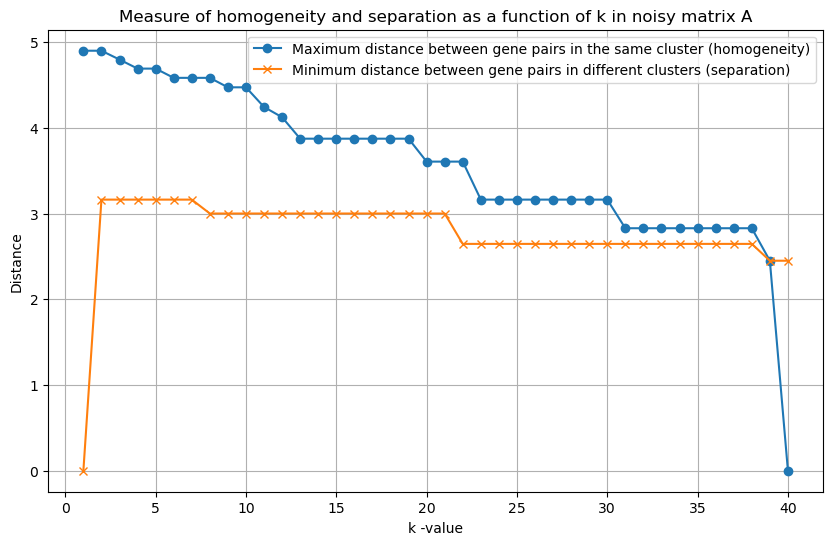

In [176]:
# Running Hierarchical clustering on noisy matrix A 
dist_mat_noisy = distance_matrix(data_noisy)

clusters_for_all_k = dict()
clusters_for_all_k_noisy = dict()
for k in k_vals:
    clusters_for_all_k_noisy[k] = hierarchical_clustering(dist_mat_noisy, k)


max_dist_same_cluster_noisyA = calc_max_dist(clusters_for_all_k_noisy, dist_mat_noisy)
min_dist_diff_cluster_noisyA = calc_min_dist(clusters_for_all_k_noisy, dist_mat_noisy)


assert max_dist_same_cluster_noisyA.keys() == min_dist_diff_cluster_noisyA.keys()
keys = list(max_dist_same_cluster_noisyA.keys())
max_values = [max_dist_same_cluster_noisyA[k] for k in keys]
min_values = [min_dist_diff_cluster_noisyA[k] for k in keys]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(keys, max_values, label='Maximum distance between gene pairs in the same cluster (homogeneity)', marker='o')
plt.plot(keys, min_values, label='Minimum distance between gene pairs in different clusters (separation)', marker='x')
plt.xlabel('k -value')
plt.ylabel('Distance')
plt.title('Measure of homogeneity and separation as a function of k in noisy matrix A')
plt.legend()
plt.grid(True)
plt.show()


In [177]:
# Running SAMBA clustering on noisy matrix 
weighted_matrix_noisy = get_weighted_matrix(data_noisy)
samba_clusters_noisy = SAMBA(data_noisy, weighted_matrix_noisy)
print(samba_clusters_noisy)


[[0], [1, 7], [2, 3, 25], [3, 19], [4, 8, 32], [5, 36], [6, 21, 28, 34, 35], [7], [8, 17], [9, 33], [10, 31], [11], [12, 16, 20], [13, 29], [14], [15, 39], [16], [17], [18], [19, 37], [20, 27], [21], [22, 26], [23, 38], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39]]
